In [1]:
import torch
from lib.core import setup_torch_device

print(torch.__version__)
setup_torch_device()

2.5.1
device: mps 1 core


'mps'

In [2]:
from data_preparation import transform_position_to_array, split_weight_units, convert_height_to_meters, \
    convert_dates_to_datetime
import pandas as pd
from tabulate import tabulate
from datetime import datetime

# Creating the data for the CSV
data = {
    "Name": ["Victor Wembanyama"],
    "Position": ["Center and Power Forward"],
    "Height": ["7-3"],
    "Weight": ["209lb (94kg)"],
    "Birthdate": ["January 4, 2004"],
    "NBA Debut": ["October 25, 2023"],
    "Experience": ["1 year"]
}

# Creating a DataFrame
df = pd.DataFrame(data)


# Transforming the Position, Weight, Height, and Date columns
df = transform_position_to_array(df, "Position")
df = split_weight_units(df, "Weight")
df = convert_height_to_meters(df, "Height")
df = convert_dates_to_datetime(df, ["Birthdate", "NBA Debut"])

# Displaying the transformed DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+-------------------+-----------------------------+----------+---------------------+---------------------+--------------+-------------------+----------------------+-------------------+
|    | Name              | Position                    | Height   | Birthdate           | NBA Debut           | Experience   |   Weight (pounds) |   Weight (kilograms) |   Height (meters) |
+====+===================+=============================+==========+=====================+=====================+==============+===================+======================+===================+
|  0 | Victor Wembanyama | ['Center', 'Power Forward'] | 7-3      | 2004-01-04 00:00:00 | 2023-10-25 00:00:00 | 1 year       |               209 |                   94 |              2.21 |
+----+-------------------+-----------------------------+----------+---------------------+---------------------+--------------+-------------------+----------------------+-------------------+


In [6]:
import pandas as pd
from tabulate import tabulate

# Adding stats for the player
stats_data = {
    "Season": ["2023-24", "2024-25", "2 Yrs"],
    "Age": [20, 21, "2 Yrs"],
    "Team": ["SAS", "SAS", "2 Yrs"],
    "Lg": ["NBA", "NBA", "2 Yrs"],
    "Pos": ["C", "C", ""],
    "G": [71, 32, 103],
    "GS": [71, 32, 103],
    "MP": [2106, 1060, 3166],
    "FG": [551, 291, 842],
    "FGA": [1186, 608, 1794],
    "FG%": [.465, .479, .469],
    "3P": [128, 105, 233],
    "3PA": [394, 297, 691],
    "3P%": [.325, .354, .337],
    "2P": [423, 186, 609],
    "2PA": [792, 311, 1103],
    "2P%": [.534, .598, .552],
    "eFG%": [.519, .565, .534],
    "FT": [292, 117, 409],
    "FTA": [367, 134, 501],
    "FT%": [.796, .873, .816],
    "ORB": [161, 60, 221],
    "DRB": [594, 285, 879],
    "TRB": [755, 345, 1100],
    "AST": [274, 120, 394],
    "STL": [88, 33, 121],
    "BLK": [254, 127, 381],
    "TOV": [260, 115, 375],
    "PF": [153, 73, 226],
    "PTS": [1522, 804, 2326],
    "Trp-Dbl": [2, 1, 3],
    "Awards": ["ROY-1DPOY-2", "", ""],
}

# Creating a DataFrame for player stats
stats_df = pd.DataFrame(stats_data)

# Dropping unwanted columns from a copy of stats_df
filtered_stats_df = stats_df.drop(columns=[
    "Awards", "Trp-Dbl", "FG%", "3P%", "2P%", "eFG%", "FT%", "Lg"
])

# Displaying the filtered stats DataFrame as a table
print("\nFiltered Player Stats:")
print(tabulate(filtered_stats_df[:2], headers='keys', tablefmt='grid'))


Filtered Player Stats:
+----+----------+-------+--------+-------+-----+------+------+------+-------+------+-------+------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+
|    | Season   |   Age | Team   | Pos   |   G |   GS |   MP |   FG |   FGA |   3P |   3PA |   2P |   2PA |   FT |   FTA |   ORB |   DRB |   TRB |   AST |   STL |   BLK |   TOV |   PF |   PTS |
+====+==========+=======+========+=======+=====+======+======+======+=======+======+=======+======+=======+======+=======+=======+=======+=======+=======+=======+=======+=======+======+=======+
|  0 | 2023-24  |    20 | SAS    | C     |  71 |   71 | 2106 |  551 |  1186 |  128 |   394 |  423 |   792 |  292 |   367 |   161 |   594 |   755 |   274 |    88 |   254 |   260 |  153 |  1522 |
+----+----------+-------+--------+-------+-----+------+------+------+-------+------+-------+------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+
|  1 |

# Saving the DataFrame to a CSV file
file_path = "Victor_Wembanyama_Profile.csv"
player_data_from.to_csv(file_path, index=False)

print(f"CSV file created at {file_path}")


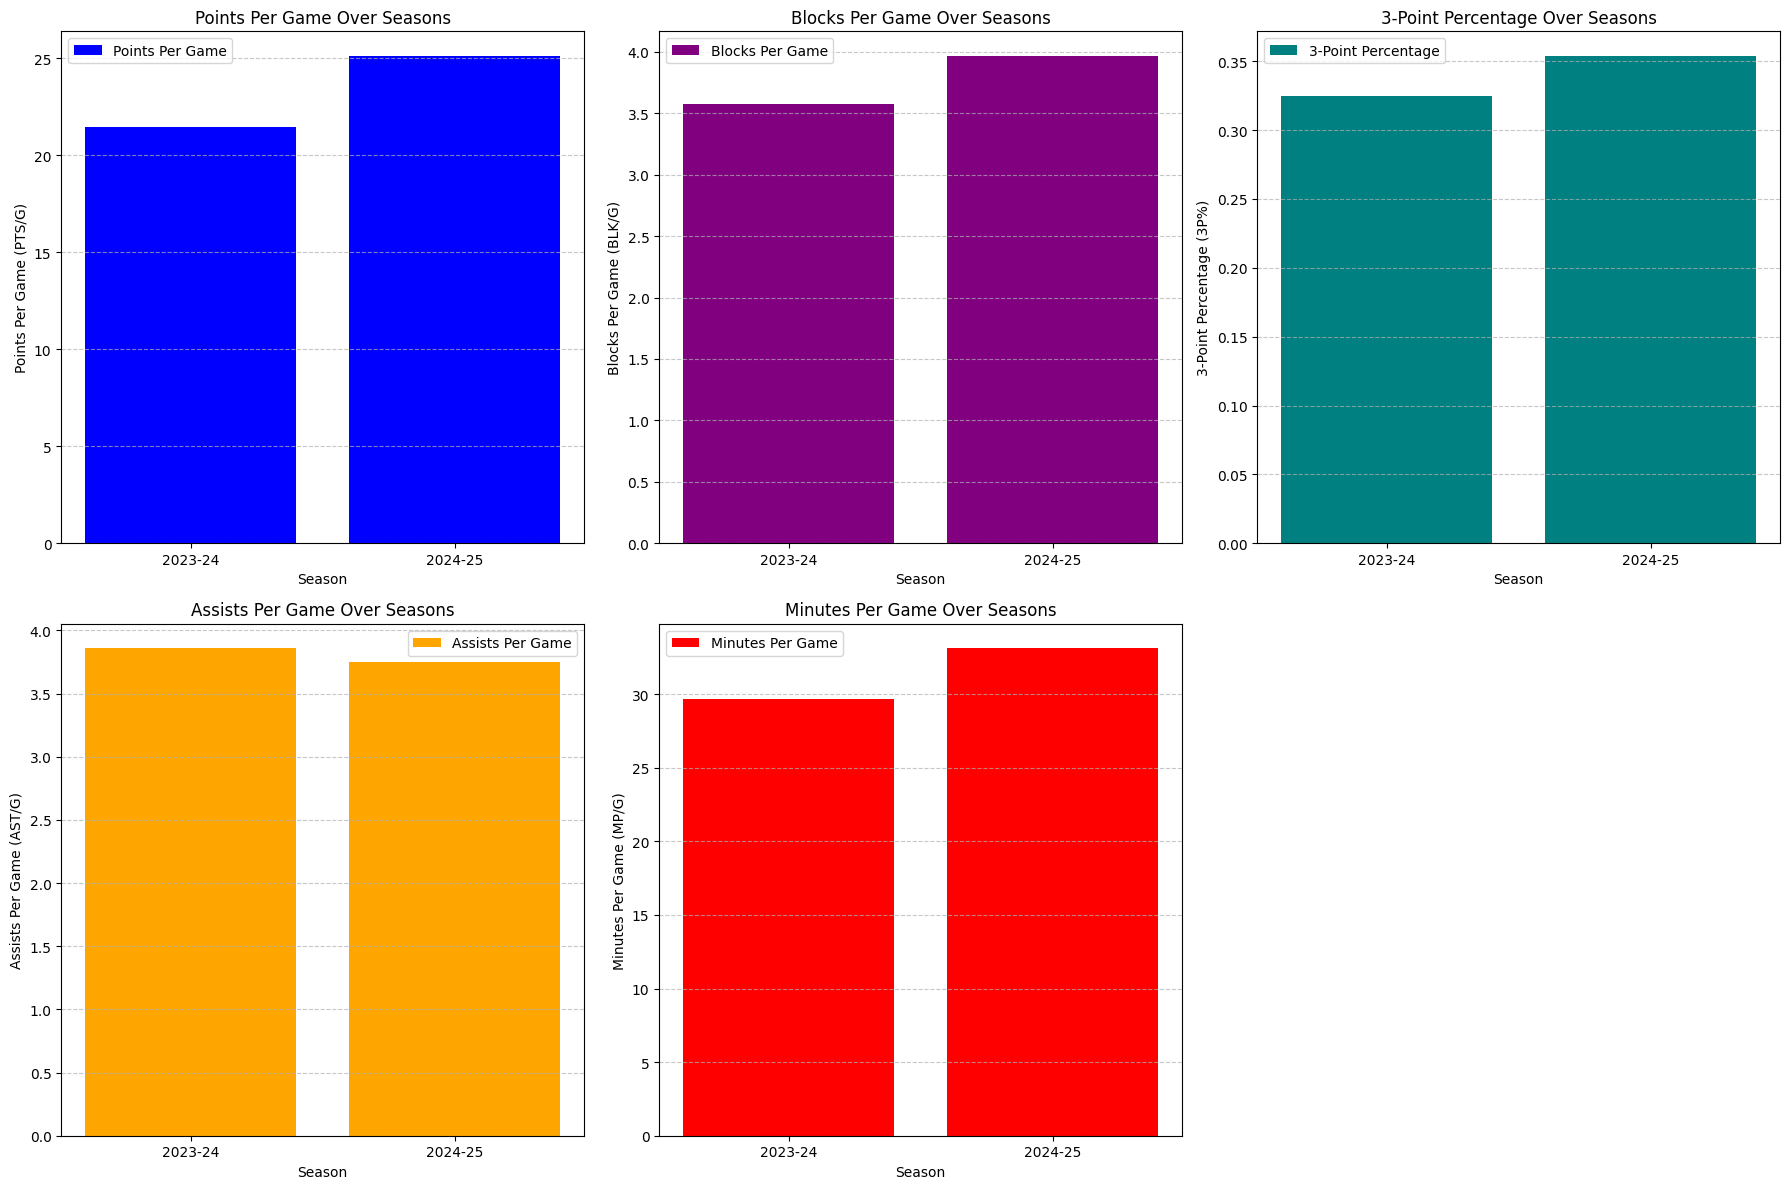

In [10]:
import matplotlib.pyplot as plt


# Calculate per-game metrics
stats_df["PTS/G"] = stats_df["PTS"] / stats_df["G"]
stats_df["TRB/G"] = stats_df["TRB"] / stats_df["G"]
stats_df["AST/G"] = stats_df["AST"] / stats_df["G"]
stats_df["BLK/G"] = stats_df["BLK"] / stats_df["G"]
stats_df["MP/G"] = stats_df["MP"] / stats_df["G"]

# Filter out the "2 Yrs" row to focus on individual seasons
filtered_seasons = stats_df[stats_df["Season"] != "2 Yrs"]

# Plot charts in a dashboard-style grid layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot Points Per Game
axes[0, 0].bar(filtered_seasons["Season"], filtered_seasons["PTS/G"], color="blue", label="Points Per Game")
axes[0, 0].set_title("Points Per Game Over Seasons")
axes[0, 0].set_xlabel("Season")
axes[0, 0].set_ylabel("Points Per Game (PTS/G)")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 0].legend()

# Plot Blocks Per Game
axes[0, 1].bar(filtered_seasons["Season"], filtered_seasons["BLK/G"], color="purple", label="Blocks Per Game")
axes[0, 1].set_title("Blocks Per Game Over Seasons")
axes[0, 1].set_xlabel("Season")
axes[0, 1].set_ylabel("Blocks Per Game (BLK/G)")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 1].legend()

# Plot 3-Point Percentage
axes[0, 2].bar(filtered_seasons["Season"], filtered_seasons["3P%"], color="teal", label="3-Point Percentage")
axes[0, 2].set_title("3-Point Percentage Over Seasons")
axes[0, 2].set_xlabel("Season")
axes[0, 2].set_ylabel("3-Point Percentage (3P%)")
axes[0, 2].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 2].legend()

# Plot Assists Per Game
axes[1, 0].bar(filtered_seasons["Season"], filtered_seasons["AST/G"], color="orange", label="Assists Per Game")
axes[1, 0].set_title("Assists Per Game Over Seasons")
axes[1, 0].set_xlabel("Season")
axes[1, 0].set_ylabel("Assists Per Game (AST/G)")
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 0].legend()

# Plot Minutes Per Game
axes[1, 1].bar(filtered_seasons["Season"], filtered_seasons["MP/G"], color="red", label="Minutes Per Game")
axes[1, 1].set_title("Minutes Per Game Over Seasons")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Minutes Per Game (MP/G)")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 1].legend()

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
[]